# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
# Let's set up our environment and import the required packages
# Include matplotlib and seaborn 

from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the pregnancy data and create a sub-dataframe of live births

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [ ]:
# Here's the histogram of birth weights

hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

In [ ]:
# To normalize the disrtibution, we could divide through by the total count

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

In [ ]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

More directly, we can create a Pmf object.

In [ ]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [ ]:
pmf.Prob(2)

The bracket operator does the same thing.

In [ ]:
pmf[2]

The `Incr` method adds to the probability associated with a given values.

In [ ]:
pmf.Incr(2, 0.2)
pmf[2]

The `Mult` method multiplies the probability associated with a value.

In [ ]:
pmf.Mult(2, 0.5)
pmf[2]

`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [ ]:
pmf.Total()

`Normalize` divides through by the total probability, making it 1 again.

In [ ]:
pmf.Normalize()
pmf.Total()

Here's the PMF of pregnancy length for live births.

In [ ]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

Here's what it looks like plotted with `Hist`, which makes a bar graph.

In [ ]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

Here's what it looks like plotted with `Pmf`, which makes a step function.

In [ ]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [3]:
# Create the rest of our dataframes

live, firsts, others = first.MakeFrames()

Here are the distributions of pregnancy length.

In [ ]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

And here's the code that replicates one of the figures in the chapter.

In [ ]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

In [ ]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')


### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [ ]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')
pmf

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [ ]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

In [ ]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [ ]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [ ]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [ ]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

And plot the two distributions to confirm they are the same.

In [ ]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

### Pandas indexing

Here's an example of a small DataFrame.

In [ ]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

We can specify column names when we create the DataFrame:

In [ ]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

We can also specify an index that contains labels for the rows.

In [ ]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

Normal indexing selects columns.

In [ ]:
df['A']

We can use the `loc` attribute to select rows.

In [ ]:
df.loc['a']

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [ ]:
df.iloc[0]

`loc` can also take a list of labels.

In [ ]:
indices = ['a', 'c']
df.loc[indices]

If you provide a slice of labels, `DataFrame` uses it to select rows.

In [ ]:
df['a':'c']

If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [ ]:
df[0:2]

But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

### Exercise 1

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

* Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

* Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

* Plot the actual and biased distributions, and compute their means.

In [4]:
# Read in the respondent data

resp = nsfg.ReadFemResp()

In [5]:
# Set Seaborn theme

sns.set_palette("BuGn_r")

In [6]:
# Create a pmf of the number of kids in the household, numkd_hh

numkdhh_pmf = resp.numkdhh.value_counts() / len(resp.numkdhh)

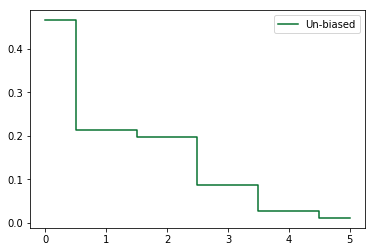

In [7]:
# Plot the pmf of number of kids in the household

ax1 = sns.lineplot(numkdhh_pmf.index, numkdhh_pmf.values, drawstyle = 'steps-mid', label = "Un-biased")
plt.show()

In [14]:
# Import additional required packages

import copy
import pandas as pd

In [15]:
# Create the biased pmf of numkd_hh

biased = copy.deepcopy(numkdhh_pmf)
sums = biased.values.sum()

for x, p in biased.items():
    biased[x] = x * p
    biased[x] /= sums

In [16]:
# Let's look at the changes

numkdhh_pmf, biased

(0    0.466178
 1    0.214052
 2    0.196258
 3    0.087139
 4    0.025644
 5    0.010729
 Name: numkdhh, dtype: float64, 0    0.000000
 1    0.214052
 2    0.392516
 3    0.261416
 4    0.102578
 5    0.053644
 Name: numkdhh, dtype: float64)

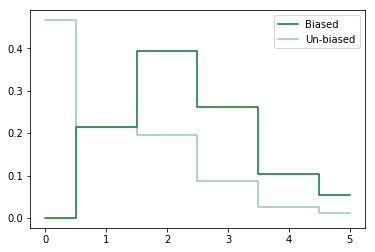

In [17]:
# Plot the pmf for the biased view of numkd_hh and the unbiased view

ax2 = sns.lineplot(biased.index, biased.values, drawstyle = 'steps-mid', label = "Biased")
sns.lineplot(numkdhh_pmf.index, numkdhh_pmf.values, ax = ax2, drawstyle = 'steps-mid', alpha = .5, label = "Un-biased")
plt.show()

In [18]:
# Calculating the mean of pmf representing numkd_hh

pmf_mean = 0.0
for x, p in numkdhh_pmf.items():
    pmf_mean += x * p
    
print('unbiased mean:', pmf_mean)

unbiased mean: 1.024205155043831


In [19]:
# Calculating the man of the pmf representing the biased view of numkd_hh

biased_mean = 0.0
for x, p in biased.items():
    biased_mean += x * p
    
print('biased mean:', biased_mean)

biased mean: 2.461860525971477


### Exercise 2

I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

* Select respondents who have at least two live births and compute pairwise differences

In [ ]:
# Load data into our useful dataframes

live, firsts, others = first.MakeFrames()

In [20]:
# We'll want to know of all pregnancies for each woman

preg_map = nsfg.MakePregMap(live)

In [21]:
# Isolating the first two pregnancies for women with at least two

siblings = {}

for caseid, indices in preg_map.items():
    if len(indices) > 1:
        first_two_lngths = preg.loc[indices[0:2]].prglngth
        diff = np.diff(first_two_lngths)[0]
        if diff in siblings:
            siblings[diff] += 1
        else:
            siblings[diff] = 1

In [31]:
# Seaborn handles dictionaries funny so...

length_diff = []
counts = []

for length, count in siblings.items():
    length_diff.append(length)
    counts.append(count)

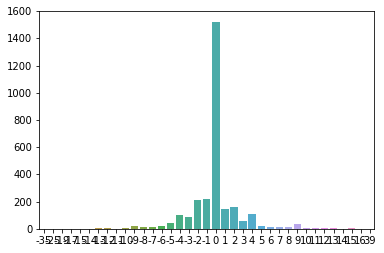

In [37]:
# Plot the histogram of the difference in pregnancy lengths between first and second babies 

axa = sns.barplot(length_diff, counts)
plt.show()

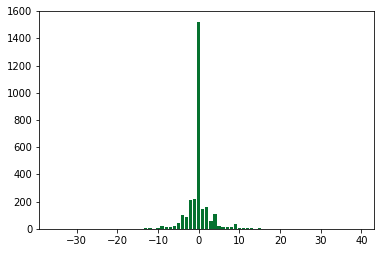

In [36]:
# Non-Seaborn plotting

non_sns = plt.bar(siblings.keys(), siblings.values())
plt.show()

### Exercise 3

The chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

* Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

* To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

* Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [143]:
# Read in the data

import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

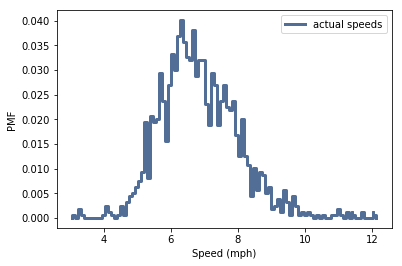

In [39]:
# Plot the pmf of the actual speeds

pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [144]:
# Create the dictionary of speeds and their frequency without the functions of the thinkplot library

speeds, speed_counts = np.unique(speeds, return_counts=True)
speeds_hist = dict(zip(speeds, speed_counts))

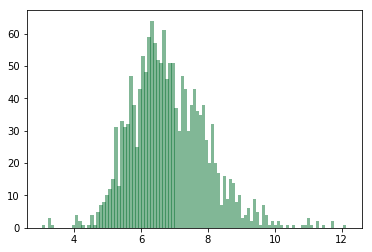

In [145]:
# Plot the histogram of the actual speeds without use of the thinkplot library

speeds_hist_plot = plt.bar(speeds_hist.keys(), speeds_hist.values(), alpha = .5, width = .1)
plt.show()

In [146]:
# Create a pmf of the actual speeds

for speed, count in speeds_hist.items():
    speeds_hist[speed] = count / 1596

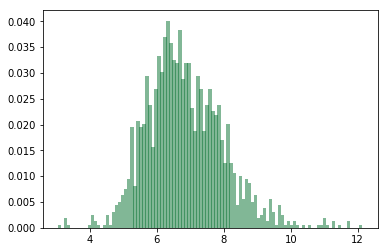

In [147]:
# Plot the pmf of the actual speeds

speeds_pmf_plot = plt.bar(speeds_hist.keys(), speeds_hist.values(), alpha = .5, width = .1)

In [141]:
def ObservedPmf(obs_speed):
    observed_pmf = copy.deepcopy(speeds_hist)
    total = 0
    
    for speed, count in observed_pmf.items():
        difference = abs(speed - obs_speed)
        observed_pmf[speed] *= difference        # multiplying by some constant C that makes speed == 7 instances equal to 0 instead
        total += count
    
    for speed, count in observed_pmf.items():
        observed_pmf[speed] = count / total
        
    return observed_pmf

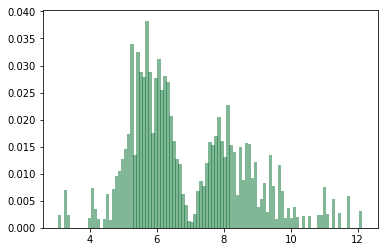

In [148]:
# Create and plot the biased pmf with observer speed = 7 mph

observed_pmf = ObservedPmf(7)
biased_pmf_plot = plt.bar(observed_pmf.keys(), observed_pmf.values(), alpha = .5, width = .1)